In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
import seaborn as sns, os

In [3]:
from scipy.stats import spearmanr, pearsonr

In [4]:
plt.style.use('tableau-colorblind10')

In [5]:
color = {'donor' + str(k): '' for k in range(1,7)}
for c, k in zip(plt.rcParams['axes.prop_cycle'].by_key()['color'], color.keys()):
    color[k] = c

In [6]:
dry_lab_dir = "dry_lab/"
out_dir = "output_dir/"

<h1>Plot for Fig 4b</h1>

In [7]:
a_sub = pd.read_csv(os.path.join(dry_lab_dir, "SciData_fig4b.csv"))

In [10]:
a_sub['demux_dons'] = a_sub['demux_dons'].astype('category')
a_sub['final_dons'] = a_sub['final_dons'].astype('category')

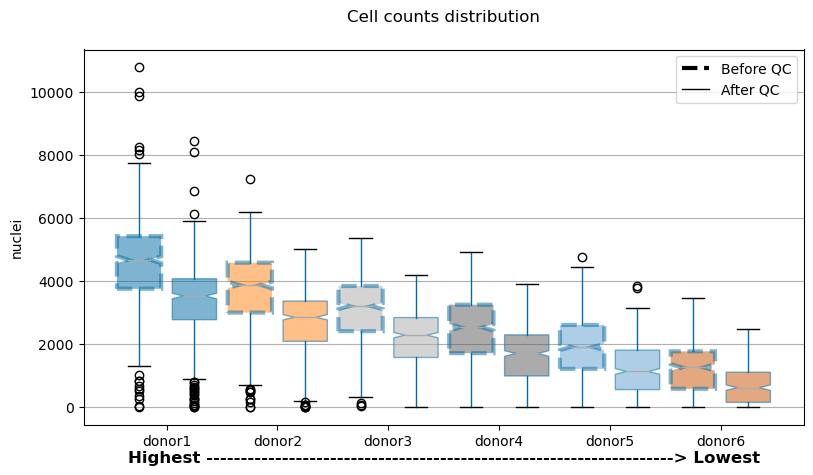

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
bplot1 = a_sub.boxplot(column=['vir_res'], by='demux_dons', grid=False, rot=0, fontsize=10, notch=True, 
                        ax=ax, patch_artist=True, return_type='dict', 
                        positions = np.arange(len(a_sub['demux_dons'].unique()))-0.25, widths=0.4,)
bplot2 = a_sub.boxplot(column=['cell_counts'], by='final_dons', grid=False, rot=0, fontsize=10, notch=True, 
                        ax=ax, patch_artist=True, return_type='dict', 
                        positions = np.arange(len(a_sub['final_dons'].unique()))+0.25, widths=0.4,)
fig.suptitle('Cell counts distribution')
for box in [bplot1, bplot2]:
    for k in box.keys():
        for i, (p, c) in enumerate(zip(box[k]['boxes'], color.values())):
            p.set_facecolor(c)
            p.set_alpha(0.5)
            if k == 'vir_res':
                # print(k)
                p.set_linestyle('--')
                p.set_linewidth(3)
                if i == 0:
                    plt.plot([], color='black', linestyle='--', linewidth=3, label='Before QC')
                    plt.legend()
            else:
                # print(k)
                p.set_linestyle('-')
                p.set_linewidth(1)
                if i == 1:
                    plt.plot([], color='black', linestyle='-', linewidth=1, label='After QC')
                    plt.legend()
                    

ax.set_xlabel(None)
ax.set_ylabel("nuclei")
ax.yaxis.grid(True)
ax.text(0.5,-0.1, "Highest --------------------------------------------------------------------> Lowest", size=12, ha="center", 
         transform=ax.transAxes, fontweight='bold')
ax.set_title('')
ax.set_xticks([i for i in np.arange(len(a_sub['demux_dons'].unique()))])
ax.set_xticklabels(a_sub['demux_dons'].cat.categories)
plt.savefig(os.path.join(out_dir, 'Boxplot-fig4b-upper.pdf'), format='pdf')
plt.show()

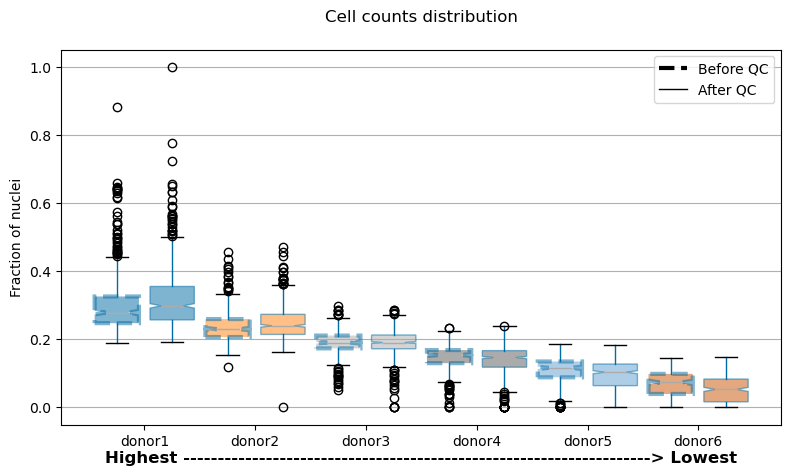

In [12]:
# boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
bplot1 = a_sub.boxplot(column=['init_ratio'], by='demux_dons', grid=False, rot=0, fontsize=10, notch=True, 
                        ax=ax, patch_artist=True, return_type='dict', positions = np.arange(len(a_sub['demux_dons'].unique()))-0.25, widths=0.4,)
bplot2 = a_sub.boxplot(column=['final_ratio'], by='final_dons', grid=False, rot=0, fontsize=10, notch=True, 
                        ax=ax, patch_artist=True, return_type='dict', positions = np.arange(len(a_sub['final_dons'].unique()))+0.25, widths=0.4,)
fig.suptitle('Cell counts distribution')
for box in [bplot1, bplot2]:
    for k in box.keys():
        for i, (p, c) in enumerate(zip(box[k]['boxes'], color.values())):
            p.set_facecolor(c)
            p.set_alpha(0.5)
            if k == 'init_ratio':
                # print(k)
                p.set_linestyle('--')
                p.set_linewidth(3)
                if i == 0:
                    plt.plot([], color='black', linestyle='--', linewidth=3, label='Before QC')
                    plt.legend()
            else:
                # print(k)
                p.set_linestyle('-')
                p.set_linewidth(1)
                if i == 1:
                    plt.plot([], color='black', linestyle='-', linewidth=1, label='After QC')
                    plt.legend()

            
            
ax.set_ylabel("Fraction of nuclei")
ax.yaxis.grid(True)
ax.text(0.5,-0.1, "Highest --------------------------------------------------------------------> Lowest", size=12, ha="center", 
         transform=ax.transAxes, fontweight='bold')
ax.set_xlabel(None)
ax.set_title('')
ax.set_xticks([i for i in np.arange(len(a_sub['demux_dons'].unique()))])
ax.set_xticklabels(a_sub['demux_dons'].cat.categories)

plt.savefig(os.path.join(out_dir, 'Boxplot-fig4b-bottom.pdf'), format='pdf')
plt.show()

<h3>Plot for Fig 4a</h3>

In [13]:
a = pd.read_csv(os.path.join(dry_lab_dir, "SciData_fig4a.csv"))

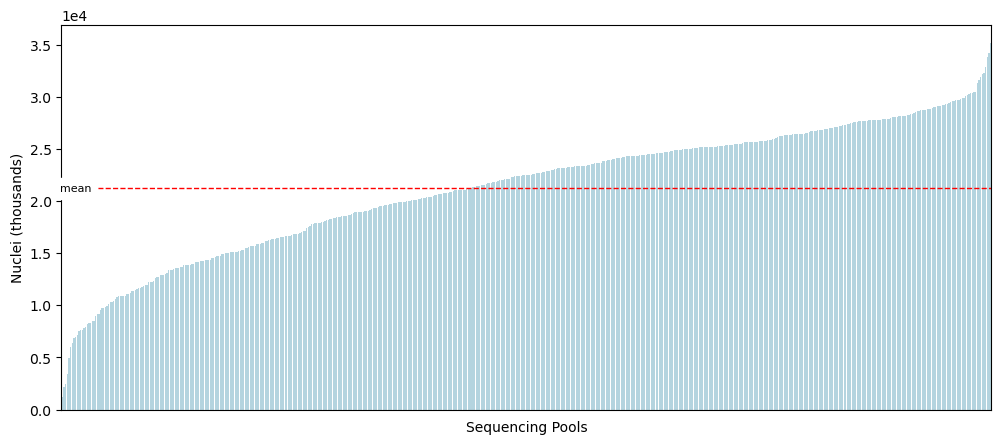

In [17]:
# Remove 2 extreme pools
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
sns.barplot(
   data=a, x="Pool_name", y="n_cells",
    ax=ax, color='lightblue', # legend=False,

)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.gca().axes.get_xaxis().set_ticks([]) # Hide x-axis
ml =  a['n_cells'].mean()
ax.axhline(ml, ls='--', c='r', lw=1)
ax.set_xlabel('Sequencing Pools')
ax.set_ylabel('Nuclei (thousands)')
plt.text(8, ml, 'mean', fontsize=8, va='center', ha='center', backgroundcolor='w')
plt.savefig(os.path.join(out_dir, 'SciData_Fig4a.pdf'), format='pdf')
plt.show()

<h2>Plot for Fig 4c</h2>

In [19]:
t_df = pd.read_csv(os.path.join(dry_lab_dir, "SciData_fig4c.csv"))

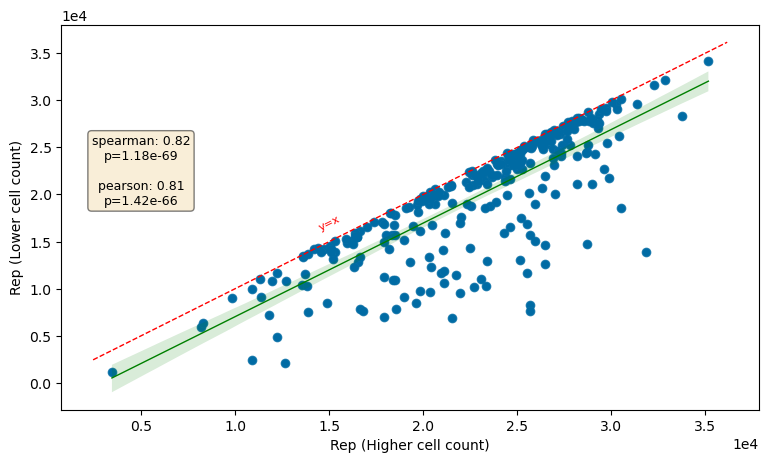

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
sns.scatterplot(
   data=t_df,
    x="n_cells_high_rep", y="n_cells_low_rep",
    ax=ax, 
)
spear_corr = spearmanr(t_df['n_cells_high_rep'], t_df['n_cells_low_rep'])
pear_corr = pearsonr(t_df['n_cells_high_rep'], t_df['n_cells_low_rep'])
min_val = max(t_df['n_cells_high_rep'].min(), t_df['n_cells_low_rep'].min())-1000
max_val = max(t_df['n_cells_high_rep'].max(), t_df['n_cells_low_rep'].max())+1000
x_vals = np.linspace(min_val, max_val, 50)

sns.lineplot(
    x=x_vals,
    y=x_vals,
    ax=ax,
    lw=1, ls='--',
    color='red'
)

plt.ticklabel_format(style='plain', axis='both')
ax.text(15000, 17000, 'y=x', rotation=45, fontsize=8, va='center', ha='center', backgroundcolor='w', rotation_mode='anchor',
              transform_rotates_text=True, color='red')
sns.regplot(data=t_df, x="n_cells_high_rep", y="n_cells_low_rep", ax=ax, 
            line_kws=dict(color="green", lw=1, ls='-'),
           )

textstr = '\n\n'.join([
    'spearman: '+str(round(spear_corr.correlation,2)) + '\np=' + str(np.format_float_scientific(spear_corr.pvalue, precision=2)),
    'pearson: ' + str(round(pear_corr.statistic,2)) + '\np=' + str(np.format_float_scientific(pear_corr.pvalue, precision=2)),
])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(5000, 22500, textstr, fontsize=9,
        verticalalignment='top', bbox=props, va='center', ha='center', backgroundcolor='w')
ax.set_xlabel('Rep (Higher cell count)')
ax.set_ylabel('Rep (Lower cell count)')
plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.savefig(os.path.join(out_dir, 'SciData_Fig4c.pdf'), format='pdf')
plt.show()

<h1>For Fig 4d</h1>

In [22]:
to_plot = pd.read_csv(os.path.join(dry_lab_dir, "SciData_fig4d.csv"))

<Axes.ArtistList of 2 lines>


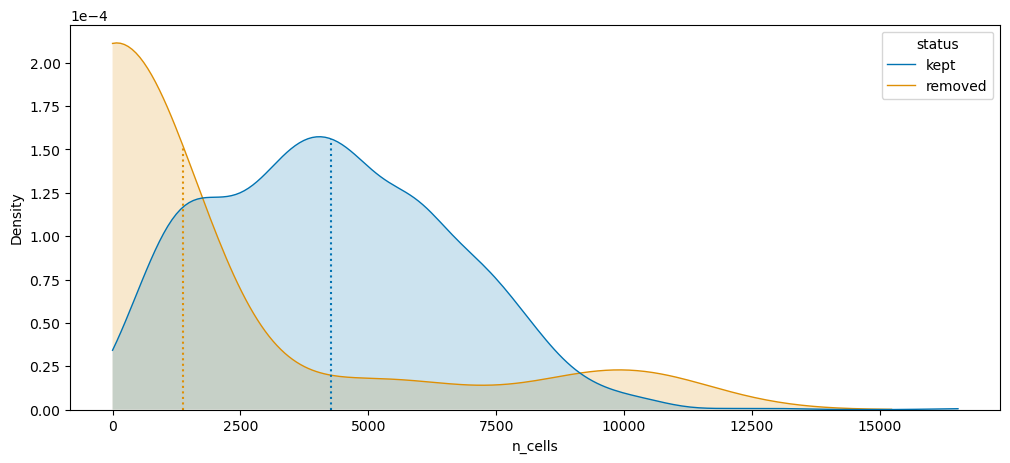

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
sns.kdeplot(
   data=to_plot, x="n_cells", hue="status",
   fill=False, common_norm=False, palette="colorblind",
   alpha=.5, linewidth=1, ax=ax, clip=(0, max(to_plot['n_cells'])),
)

# Plot mean lines
print(ax.lines)
for idx, l in enumerate(ax.lines):
    kdeline = l
    if idx == 0:
        mean = to_plot.loc[to_plot['status'] == 'removed', 'n_cells'].mean()
    else:
        mean = to_plot.loc[to_plot['status'] == 'kept', 'n_cells'].mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    if idx == 0:
        ax.vlines(mean, 0, height, color=l.get_color(), ls=':')
        ax.fill_between(xs, 0, ys, facecolor=l.get_color(), alpha=0.2)
    else:
        ax.vlines(mean, 0, height, color=l.get_color(), ls=':')
        ax.fill_between(xs, 0, ys, facecolor=l.get_color(), alpha=0.2)


plt.ticklabel_format(style='plain', axis='y')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.savefig(os.path.join(out_dir, 'SciData_Fig4d.pdf'), format='pdf')
plt.show()